In [1]:
from linares_plot import *

In [ ]:
### Recording, se genera txt

In [346]:
file ='recording3.txt'
file ='rester.txt'

In [347]:
data = pd.read_csv(file, delimiter=',', header=None)

In [348]:
### 0,0 es arriba a la izquierda!!

In [349]:
### Remove NANs

In [350]:
print(len(data))
data.iloc[:,2].unique()

658


array(['statuscode:200', nan], dtype=object)

In [351]:
df_ = data[data.iloc[:,2]=='statuscode:200']
df_ = df_.reset_index()

In [352]:
df_.head(5)

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":527.6405",y:280.0233},fix:true,"lefteye:{""avg"":{""x"":575.9943",y:290.9440},"pcenter:{""x"":0.3130",...,"righteye:{""avg"":{""x"":480.7565",y:279.9606},"pcenter:{""x"":0.4735",y:0.6278},psize:17.8942,"raw:{""x"":488.7872",y:293.0813}},state:7,time:753147758,"timestamp:""2022-02-24 19:00:22.126""}}}"
1,1,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":530.9612",y:280.8741},fix:true,"lefteye:{""avg"":{""x"":575.8290",y:290.1574},"pcenter:{""x"":0.3130",...,"righteye:{""avg"":{""x"":481.9774",y:279.1297},"pcenter:{""x"":0.4735",y:0.6276},psize:17.5901,"raw:{""x"":501.1154",y:261.4662}},state:7,time:753147791,"timestamp:""2022-02-24 19:00:22.159""}}}"
2,2,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":531.5813",y:281.3464},fix:true,"lefteye:{""avg"":{""x"":576.2083",y:290.2104},"pcenter:{""x"":0.3129",...,"righteye:{""avg"":{""x"":482.7520",y:279.1657},"pcenter:{""x"":0.4734",y:0.6277},psize:17.7342,"raw:{""x"":491.3210",y:276.2978}},state:7,time:753147824,"timestamp:""2022-02-24 19:00:22.192""}}}"
3,3,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":531.8276",y:281.7735},fix:true,"lefteye:{""avg"":{""x"":576.1766",y:290.5203},"pcenter:{""x"":0.3128",...,"righteye:{""avg"":{""x"":482.5212",y:279.2290},"pcenter:{""x"":0.4733",y:0.6277},psize:17.9127,"raw:{""x"":480.4534",y:272.7168}},state:7,time:753147858,"timestamp:""2022-02-24 19:00:22.226""}}}"
4,4,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":532.2375",y:282.2017},fix:true,"lefteye:{""avg"":{""x"":576.0515",y:290.0358},"pcenter:{""x"":0.3128",...,"righteye:{""avg"":{""x"":482.6854",y:279.6126},"pcenter:{""x"":0.4733",y:0.6278},psize:17.6635,"raw:{""x"":482.8904",y:284.1649}},state:7,time:753147891,"timestamp:""2022-02-24 19:00:22.259""}}}"


4,5 --> xy average  
7,8 --> xy left eye  
9,10 --> pcenter left eye  
11 --> psize left  
16,17 --> xy right eye  
18,19 --> pcenter right eye  
20 --> psize left  


In [353]:
pos_x = []
pos_y = []
time_ = []
for i in range(len(df_)):
    x = float(df_.iloc[:,4][i].split(':')[-1])
    pos_x.append(x)
    y = float(df_.iloc[:,5][i].split(':')[1].split('}')[0])
    pos_y.append(y)
    time = df_.iloc[:,-1][i].split(' ')[-1].split('}')[0].split('"')[0]
    time_.append(time)

In [354]:
df = pd.DataFrame({'x':pos_x, 'y':pos_y, 'time': time_})
df.head()

,time,x,y
0,19:00:22.126,527.6405,280.0233
1,19:00:22.159,530.9612,280.8741
2,19:00:22.192,531.5813,281.3464
3,19:00:22.226,531.8276,281.7735
4,19:00:22.259,532.2375,282.2017


In [355]:
df = df.loc[df['x']!=0]
df = df.loc[df['y']!=0]

In [356]:
len(df)

591

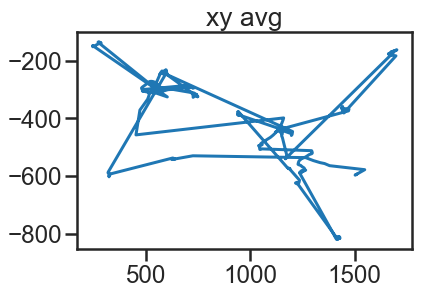

In [357]:
plt.title('xy avg')
plt.plot(df.x, 1-df.y)

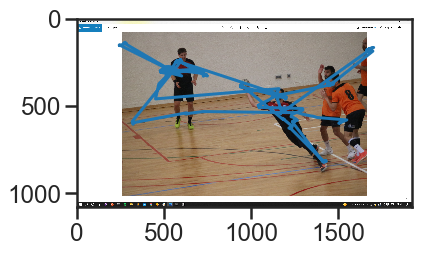

In [358]:
import matplotlib.image as mpimg
img = mpimg.imread('seen2.png')
imgplot = plt.imshow(img)
plt.plot(df.x, df.y)

In [359]:
D = np.shape(img)[1]/100, np.shape(img)[0]/100

In [360]:
df['x_int'] = df['x'].astype(int)
df['y_int'] = df['y'].astype(int)

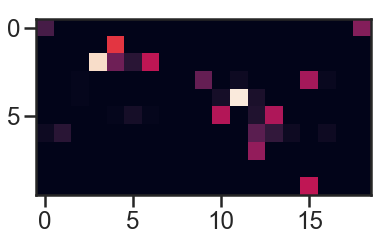

In [361]:
heatmap, xedges, yedges = np.histogram2d(df.x_int, df.y_int, bins=D)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T) #, extent=extent, origin='lower')
plt.show()

In [345]:
np.shape(heatmap)

(19, 10)

In [ ]:
https://github.com/TobiasRoeddiger/GazePointHeatMap

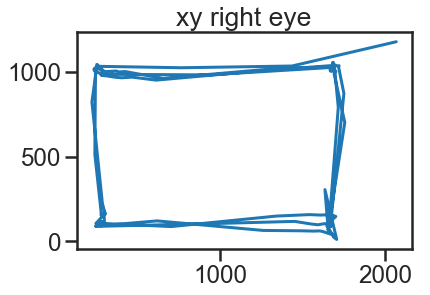

In [262]:
plt.title('xy right eye')
plt.plot(df.x, df.y)

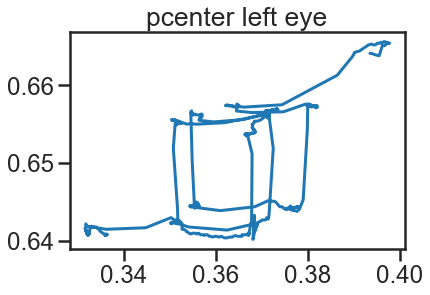

In [258]:
plt.title('pcenter left eye')
plt.plot(df.x, df.y)

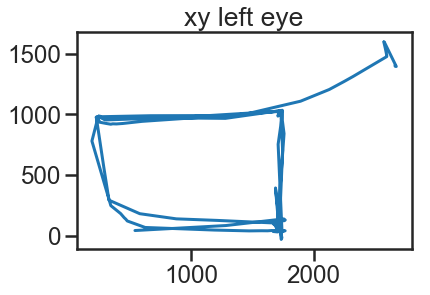

In [253]:
plt.title('xy left eye')
plt.plot(df.x, df.y)

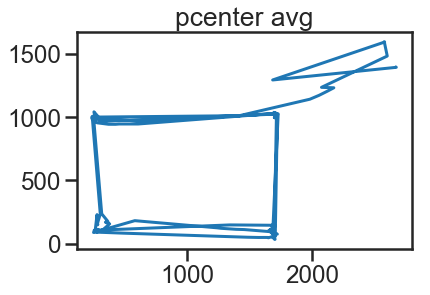

In [219]:
plt.title('xy avg')
plt.plot(df.x, df.y)

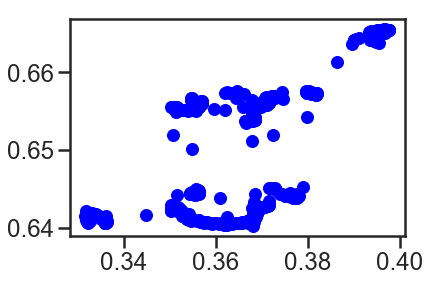

In [158]:
plt.plot(df.x, df.y, 'bo')

In [119]:
dims = (int(1920/100),int(1080/100))

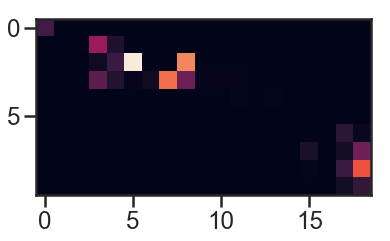

In [120]:
heatmap, xedges, yedges = np.histogram2d(df_.x, df_.y, bins=dims)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T) #, extent=extent, origin='lower')
plt.show()

In [108]:
dims = (df_.x.max(), df_.y.max())

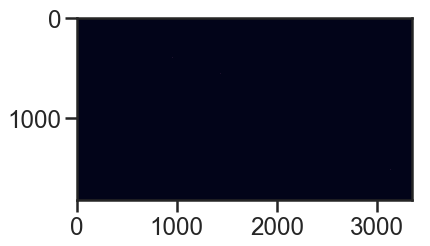

In [109]:
heatmap, xedges, yedges = np.histogram2d(df_.x, df_.y, bins=dims)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T) #, extent=extent, origin='lower')
plt.show()

In [112]:
sum(heatmap[3186:])

array([0., 0., 0., ..., 0., 0., 1.])

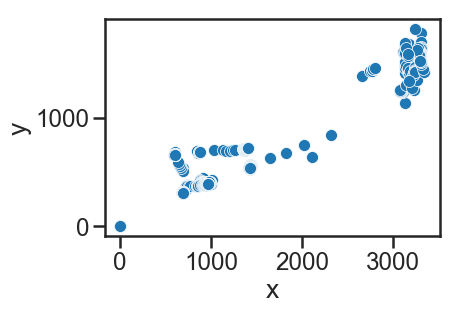

In [88]:
sns.scatterplot(x='x', y='y', data=df_)

In [104]:
df_x

NameError: name 'df_x' is not defined

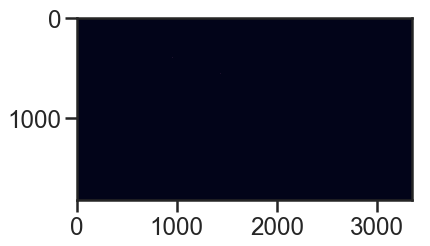

In [98]:

heatmap, xedges, yedges = np.histogram2d(df_.x, df_.y, bins=(3344, 1818))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T) #, extent=extent, origin='lower')
plt.show()

In [102]:
np.shape(heatmap)

(3344, 1818)

In [94]:
print(df_.x.max())
print(df_.y.max())

3344.304
1818.7042


In [81]:
df.iloc[:,-1][0].split(' ')[-1].split('}')[0].split('"')[0]

'16:58:40.802'

In [73]:
float(df.iloc[:,5][0].split(':')[1].split('}')[0])

1360.438

In [53]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3192.5493",y:1360.4380},fix:false,"lefteye:{""avg"":{""x"":3208.2761",y:1475.5612},"pcenter:{""x"":0.4889",y:0.5135},...,"righteye:{""avg"":{""x"":3162.4949",y:1158.6604},"pcenter:{""x"":0.6350",y:0.5604},psize:18.7045,"raw:{""x"":3162.4949",y:1158.6604}},state:7,time:745846434,"timestamp:""2022-02-24 16:58:40.802""}}}"
1,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3188.0786",y:1318.4167},fix:false,"lefteye:{""avg"":{""x"":3206.9280",y:1471.0730},"pcenter:{""x"":0.4887",y:0.5137},...,"righteye:{""avg"":{""x"":3170.5042",y:1153.1619},"pcenter:{""x"":0.6348",y:0.5605},psize:18.7830,"raw:{""x"":3178.4932",y:1147.6772}},state:7,time:745846468,"timestamp:""2022-02-24 16:58:40.836""}}}"
2,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3186.3933",y:1321.2983},fix:false,"lefteye:{""avg"":{""x"":3205.0676",y:1470.4415},"pcenter:{""x"":0.4885",y:0.5138},...,"righteye:{""avg"":{""x"":3164.4788",y:1146.2719},"pcenter:{""x"":0.6345",y:0.5606},psize:18.8117,"raw:{""x"":3152.4631",y:1132.6069}},state:7,time:745846501,"timestamp:""2022-02-24 16:58:40.869""}}}"
3,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3130.3647",y:1138.7164},fix:false,"lefteye:{""avg"":{""x"":3048.8669",y:1377.8784},"pcenter:{""x"":0.4876",y:0.5131},...,"righteye:{""avg"":{""x"":3130.3647",y:1138.7164},"pcenter:{""x"":0.6337",y:0.560},psize:19.0406,"raw:{""x"":3029.2817",y:1116.4486}},state:7,time:745846534,"timestamp:""2022-02-24 16:58:40.902""}}}"
4,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3107.0664",y:1236.030},fix:false,"lefteye:{""avg"":{""x"":3071.9919",y:1410.3341},"pcenter:{""x"":0.4881",y:0.5132},...,"righteye:{""avg"":{""x"":3114.5413",y:1132.6543},"pcenter:{""x"":0.6339",y:0.5601},psize:19.2129,"raw:{""x"":3053.510",y:1109.2177}},state:7,time:745846567,"timestamp:""2022-02-24 16:58:40.935""}}}"
5,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3097.9880",y:1246.9502},fix:false,"lefteye:{""avg"":{""x"":3058.8796",y:1412.2914},"pcenter:{""x"":0.4886",y:0.5131},...,"righteye:{""avg"":{""x"":3100.5928",y:1128.4816},"pcenter:{""x"":0.6342",y:0.5603},psize:19.2484,"raw:{""x"":3034.5881",y:1108.8330}},state:7,time:745846601,"timestamp:""2022-02-24 16:58:40.969""}}}"
6,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3093.5693",y:1238.3721},fix:false,"lefteye:{""avg"":{""x"":3058.6675",y:1401.1631},"pcenter:{""x"":0.4894",y:0.5127},...,"righteye:{""avg"":{""x"":3090.4946",y:1128.6182},"pcenter:{""x"":0.6347",y:0.5605},psize:19.4785,"raw:{""x"":3034.960",y:1130.3337}},state:7,time:745846634,"timestamp:""2022-02-24 16:58:41.002""}}}"
7,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3088.6548",y:1245.3273},fix:false,"lefteye:{""avg"":{""x"":3058.5828",y:1402.4757},"pcenter:{""x"":0.4901",y:0.5128},...,"righteye:{""avg"":{""x"":3081.9736",y:1129.6149},"pcenter:{""x"":0.6353",y:0.5608},psize:19.7932,"raw:{""x"":3028.9302",y:1137.1251}},state:7,time:745846667,"timestamp:""2022-02-24 16:58:41.035""}}}"
8,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3084.9636",y:1245.3341},fix:true,"lefteye:{""avg"":{""x"":3059.1174",y:1398.2651},"pcenter:{""x"":0.4909",y:0.5126},...,"righteye:{""avg"":{""x"":3074.1208",y:1127.2998},"pcenter:{""x"":0.6358",y:0.5610},psize:19.6888,"raw:{""x"":3019.8137",y:1110.6233}},state:7,time:745846701,"timestamp:""2022-02-24 16:58:41.069""}}}"
10,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3081.8843",y:1246.8584},fix:true,"lefteye:{""avg"":{""x"":3058.6782",y:

In [52]:
df.iloc[9]

0                      {"category":"tracker"
1                              request:"get"
2                             statuscode:200
3      values:{"frame":{"avg":{"x":3081.8843
4                               y:1246.8584}
5                                   fix:true
6              lefteye:{"avg":{"x":3058.6782
7                               y:1397.1122}
8                        pcenter:{"x":0.4913
9                                  y:0.5124}
10                             psize:19.5989
11                        raw:{"x":3056.5818
12                             y:1391.8253}}
13                        raw:{"x":3051.9551
14                              y:1256.7532}
15            righteye:{"avg":{"x":3070.6343
16                              y:1126.5854}
17                       pcenter:{"x":0.6363
18                                 y:0.5612}
19                             psize:19.8574
20                        raw:{"x":3047.3286
21                             y:1121.6810}}
22        

In [50]:
print(len(df))

418


In [51]:
for i in range(len(df)):
    x = df.iloc[:,3][i].split(':')[-1]
    print(i, x)


0 3192.5493
1 3188.0786
2 3186.3933
3 3130.3647
4 3107.0664
5 3097.9880
6 3093.5693
7 3088.6548
8 3084.9636


KeyError: 9

In [32]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3192.5493",y:1360.4380},fix:false,"lefteye:{""avg"":{""x"":3208.2761",y:1475.5612},"pcenter:{""x"":0.4889",y:0.5135},...,"righteye:{""avg"":{""x"":3162.4949",y:1158.6604},"pcenter:{""x"":0.6350",y:0.5604},psize:18.7045,"raw:{""x"":3162.4949",y:1158.6604}},state:7,time:745846434,"timestamp:""2022-02-24 16:58:40.802""}}}"
1,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3188.0786",y:1318.4167},fix:false,"lefteye:{""avg"":{""x"":3206.9280",y:1471.0730},"pcenter:{""x"":0.4887",y:0.5137},...,"righteye:{""avg"":{""x"":3170.5042",y:1153.1619},"pcenter:{""x"":0.6348",y:0.5605},psize:18.7830,"raw:{""x"":3178.4932",y:1147.6772}},state:7,time:745846468,"timestamp:""2022-02-24 16:58:40.836""}}}"
2,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3186.3933",y:1321.2983},fix:false,"lefteye:{""avg"":{""x"":3205.0676",y:1470.4415},"pcenter:{""x"":0.4885",y:0.5138},...,"righteye:{""avg"":{""x"":3164.4788",y:1146.2719},"pcenter:{""x"":0.6345",y:0.5606},psize:18.8117,"raw:{""x"":3152.4631",y:1132.6069}},state:7,time:745846501,"timestamp:""2022-02-24 16:58:40.869""}}}"
3,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3130.3647",y:1138.7164},fix:false,"lefteye:{""avg"":{""x"":3048.8669",y:1377.8784},"pcenter:{""x"":0.4876",y:0.5131},...,"righteye:{""avg"":{""x"":3130.3647",y:1138.7164},"pcenter:{""x"":0.6337",y:0.560},psize:19.0406,"raw:{""x"":3029.2817",y:1116.4486}},state:7,time:745846534,"timestamp:""2022-02-24 16:58:40.902""}}}"
4,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3107.0664",y:1236.030},fix:false,"lefteye:{""avg"":{""x"":3071.9919",y:1410.3341},"pcenter:{""x"":0.4881",y:0.5132},...,"righteye:{""avg"":{""x"":3114.5413",y:1132.6543},"pcenter:{""x"":0.6339",y:0.5601},psize:19.2129,"raw:{""x"":3053.510",y:1109.2177}},state:7,time:745846567,"timestamp:""2022-02-24 16:58:40.935""}}}"
5,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3097.9880",y:1246.9502},fix:false,"lefteye:{""avg"":{""x"":3058.8796",y:1412.2914},"pcenter:{""x"":0.4886",y:0.5131},...,"righteye:{""avg"":{""x"":3100.5928",y:1128.4816},"pcenter:{""x"":0.6342",y:0.5603},psize:19.2484,"raw:{""x"":3034.5881",y:1108.8330}},state:7,time:745846601,"timestamp:""2022-02-24 16:58:40.969""}}}"
6,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3093.5693",y:1238.3721},fix:false,"lefteye:{""avg"":{""x"":3058.6675",y:1401.1631},"pcenter:{""x"":0.4894",y:0.5127},...,"righteye:{""avg"":{""x"":3090.4946",y:1128.6182},"pcenter:{""x"":0.6347",y:0.5605},psize:19.4785,"raw:{""x"":3034.960",y:1130.3337}},state:7,time:745846634,"timestamp:""2022-02-24 16:58:41.002""}}}"
7,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3088.6548",y:1245.3273},fix:false,"lefteye:{""avg"":{""x"":3058.5828",y:1402.4757},"pcenter:{""x"":0.4901",y:0.5128},...,"righteye:{""avg"":{""x"":3081.9736",y:1129.6149},"pcenter:{""x"":0.6353",y:0.5608},psize:19.7932,"raw:{""x"":3028.9302",y:1137.1251}},state:7,time:745846667,"timestamp:""2022-02-24 16:58:41.035""}}}"
8,"{""category"":""tracker""","request:""get""",statuscode:200,"values:{""frame"":{""avg"":{""x"":3084.9636",y:1245.3341},fix:true,"lefteye:{""avg"":{""x"":3059.1174",y:1398.2651},"pcenter:{""x"":0.4909",y:0.5126},...,"righteye:{""avg"":{""x"":3074.1208",y:1127.2998},"pcenter:{""x"":0.6358",y:0.5610},psize:19.6888,"raw:{""x"":3019.8137",y:1110.6233}},state:7,time:745846701,"timestamp:""2022-02-24 16:58:41.069""}}}"
9,"{""category"":""heartbeat""",statuscode:200},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data[data.iloc[:,2]=='statuscode:200']

418

In [41]:
data.iloc[:,2].unique()

array(['statuscode:200', nan], dtype=object)

In [45]:
data.iloc[:,2].unique()

array(['statuscode:200', nan], dtype=object)

In [46]:
len(data)

462

In [28]:
np.isnan(data.iloc[:,3])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
for i in range(len(data)):
    x = data.iloc[:,3][i].split(':')[-1]
    print(i, x)



0 3192.5493
1 3188.0786
2 3186.3933
3 3130.3647
4 3107.0664
5 3097.9880
6 3093.5693
7 3088.6548
8 3084.9636


AttributeError: 'float' object has no attribute 'split'

In [6]:
import os
os.getcwd()

'C:\\Users\\David\\Documents\\GitHub\\OpenBrains\\Eyetraker'

AttributeError: module 'io' has no attribute 'path'

In [8]:
file ='C:\\Users\\David\\Desktop\\recordings.txt'
data = np.loadtxt(file, delimiter=',')

ValueError: could not convert string to float: '{"category":"tracker"'